# Exploratory data analysis

This notebook contains the code related to data preparation and exploratory analysis for the King County's housing data.

General guidelines:

* Analyse the variables and their types (change if necessary)
* How relevant is each variable to our task? (High, medium or low importance)
* Understand the variables and their relations (categorical - count and bars, numerical - describe and hist, relations - seaborn, boxplot)
* Analyse the distribution (skew, kurtosis, is it normal, what pattern does it follow ?)
* Do we need some new variables?
* Clean dataset (rename weirdly named variables, remove zero values, duplicates, fixing weird values (missing value? ) etc.)
* Use functions to avoid code duplication and keep data in the same variable to maintain code blocks usage
* Anything else?

In [2]:
# Load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Constants definitions
price = 'price'
bedrooms = 'bedrooms'
bathrooms = 'bathrooms'
squares = 'sqft_living'
view = 'view'
waterfront = 'waterfront'
grade = 'grade'
squares_above = 'sqft_above'
neighborhood = 'sqft_living15'
age = 'yr_built'

# Data variables descriptions

![image](Images/description.png)


In [3]:
# load data
house_data = pd.read_csv("./Data/kc_house_data.csv")
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Questions

The main business problem we want to solve:
**- Can a real-estate company successfully increase their profit by house sales price predictions?**

Questions to answer:
1.  In which housing features should the real-estate company invest in for sales price increase?
2.   Where is the best location to negotiate housing value?
3.   Will the housing price increase as expected after a renovaton?
4. Which property types (based on square footage) will create the highest value?

## Hypotheses

* H1: Distance (lat, long) or location to have significant impact on the price
* H2: Properties closer to public facilities like schools and hospitals or with good views will have higher prices
* H3: Properties with more sqft_living will have higher prices regardless of location


In [4]:
# data description
house_data.info()
house_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# data preparation 

# check for missing values
house_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Data visualization


<AxesSubplot: >

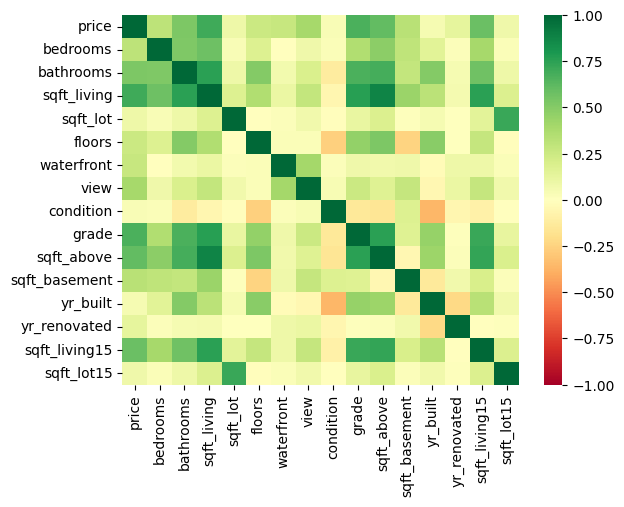

In [6]:
# Correlation between variables
cor_mat = house_data[[i for i in house_data.columns.tolist() if i not in ['id', 'date', 'zipcode','lat', 'long']]].corr()
sns.heatmap(cor_mat, vmin=-1, vmax=1, cmap='RdYlGn')


### Notes

* price, sqft_living, sqft_above & grade  appear most correlated
* sqft_living & sqft_living15 ; sqft_lot & sqft_lot15 -> impact of neighbourhood
* very small correlation between renovation and price (Is grade more relevant here?)
* Negative correlation for condition and yr_built
* No correlation between price and yr_built? - shouldn't it be negative?
* **What should companies invest in for sales prices increase?**
    * Beside the grade and sqft, also the view, waterfront, neighbourhood(sqft_living15) and # of bedrooms/bathrooms can be "manipulated")



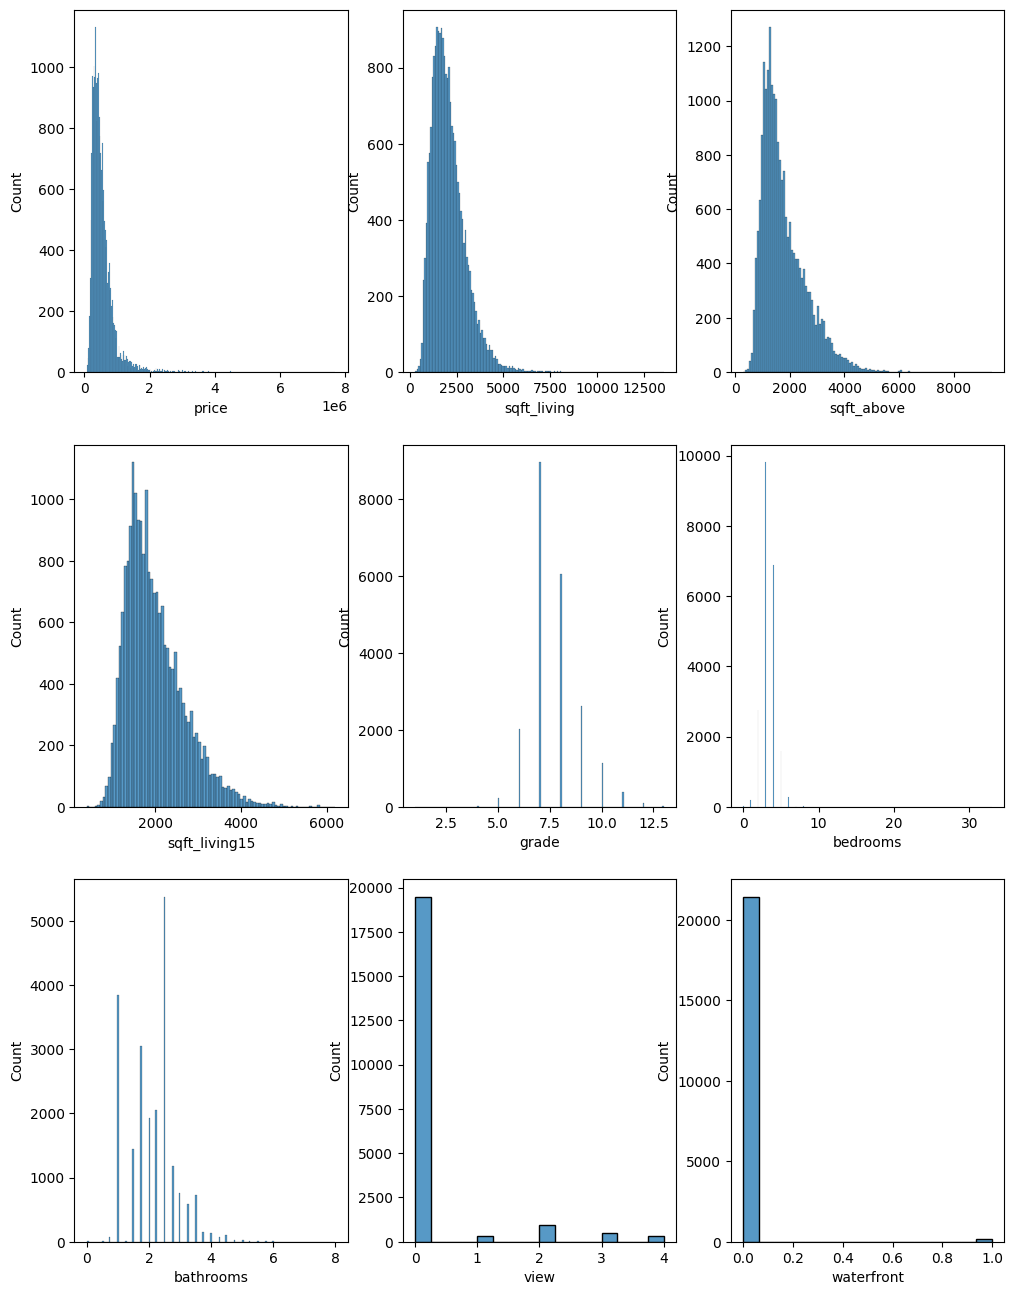

In [7]:
# Visualize the distribuitons for main price related features
features = [price, squares, squares_above, neighborhood, grade, bedrooms, bathrooms, view, waterfront]
figure, axes = plt.subplots(3,3, figsize=(12,16))
for idx in range(0, len(features)):
    sns.histplot(ax=axes[int(idx/3),int(idx%3)], data=house_data[features[idx]])

<AxesSubplot: xlabel='yr_built', ylabel='price'>

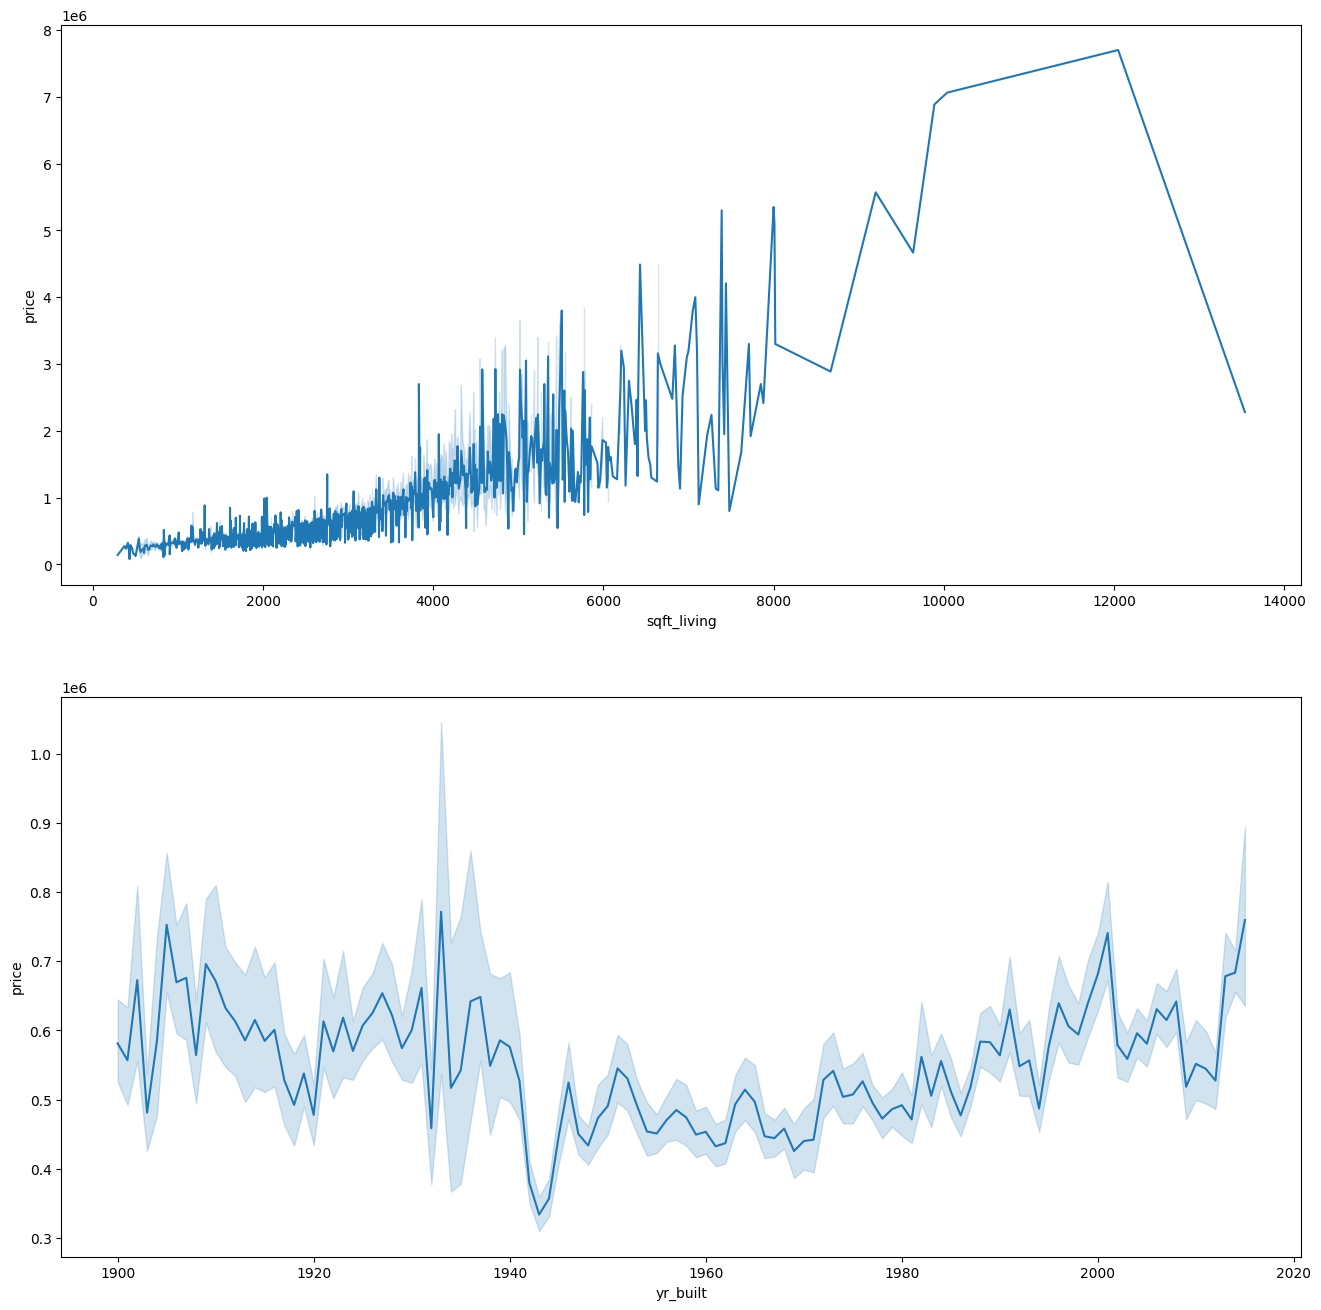

In [8]:
# price and sqft_living (non-categorical)
figure, axes = plt.subplots(2, 1, figsize=(16,16))
sns.lineplot(ax=axes[0], x=squares, y=price, data=house_data)
sns.lineplot(ax=axes[1], x=age, y=price, data=house_data)

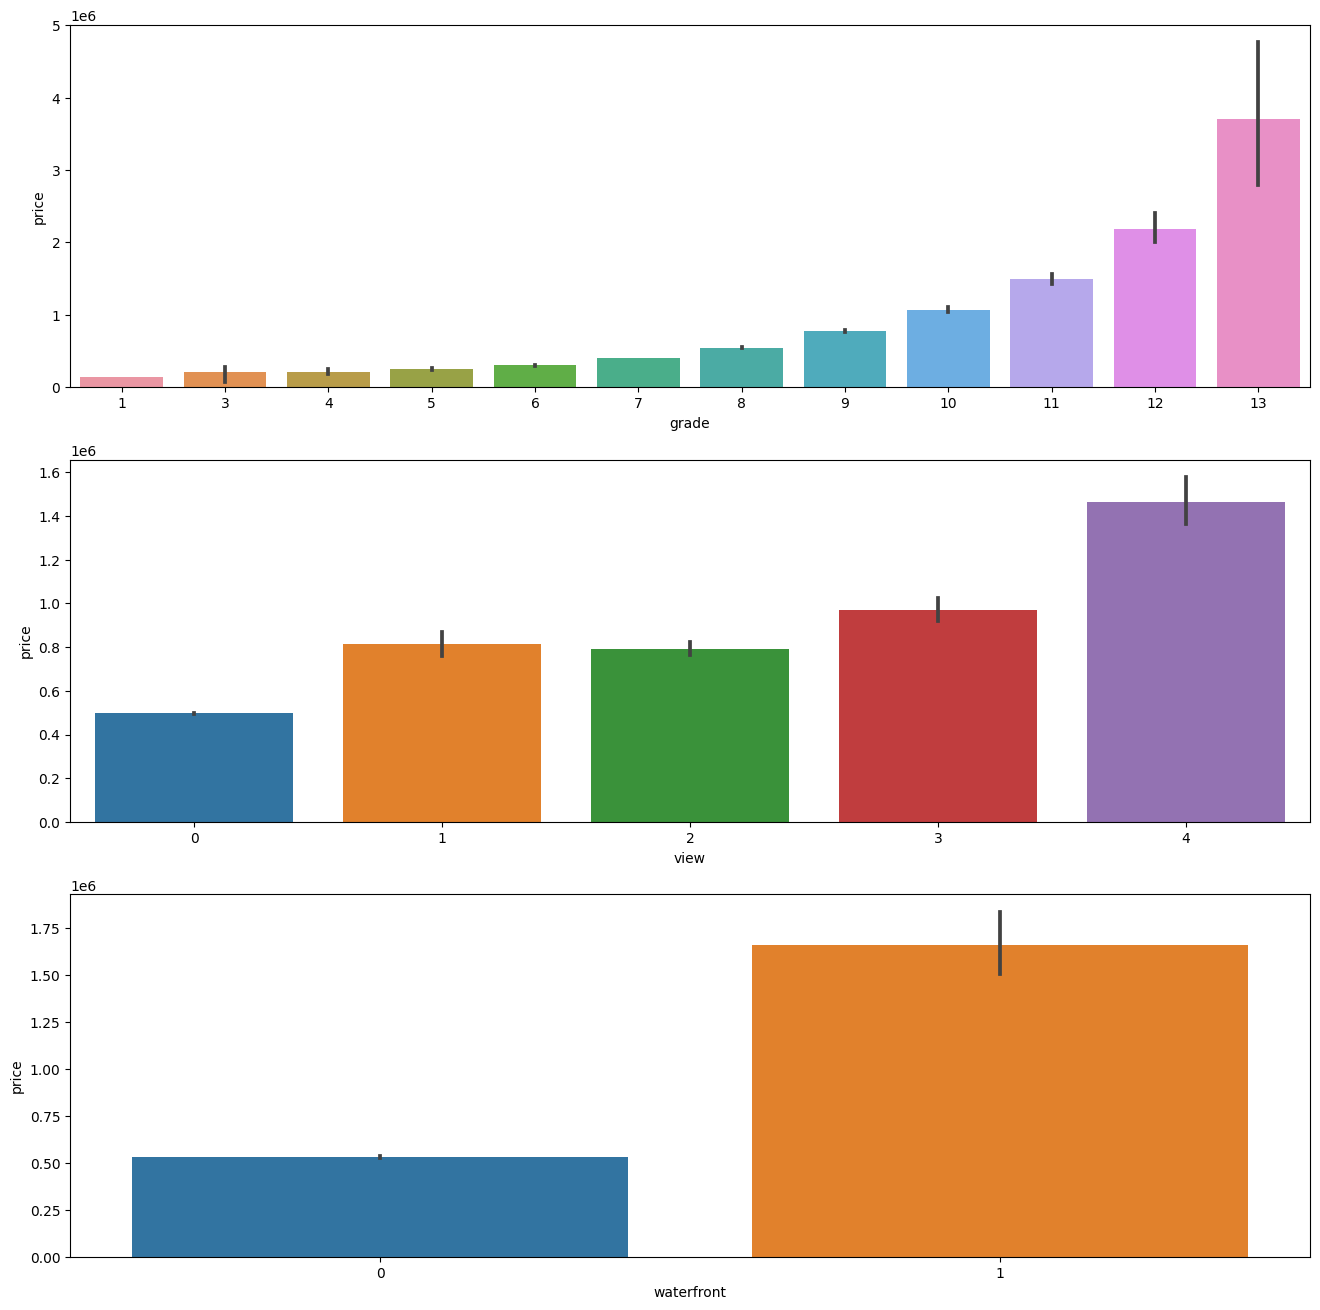

In [9]:

# price and grade, price and view and price and waterfront (categorical)
features = [grade, view, waterfront]
figure, axes = plt.subplots(3, 1, figsize=(16,16))
for idx in range(0, len(features)):
    sns.barplot(ax=axes[int(idx%3)], x=features[idx], y=price, data=house_data)

<AxesSubplot: xlabel='bathrooms', ylabel='price'>

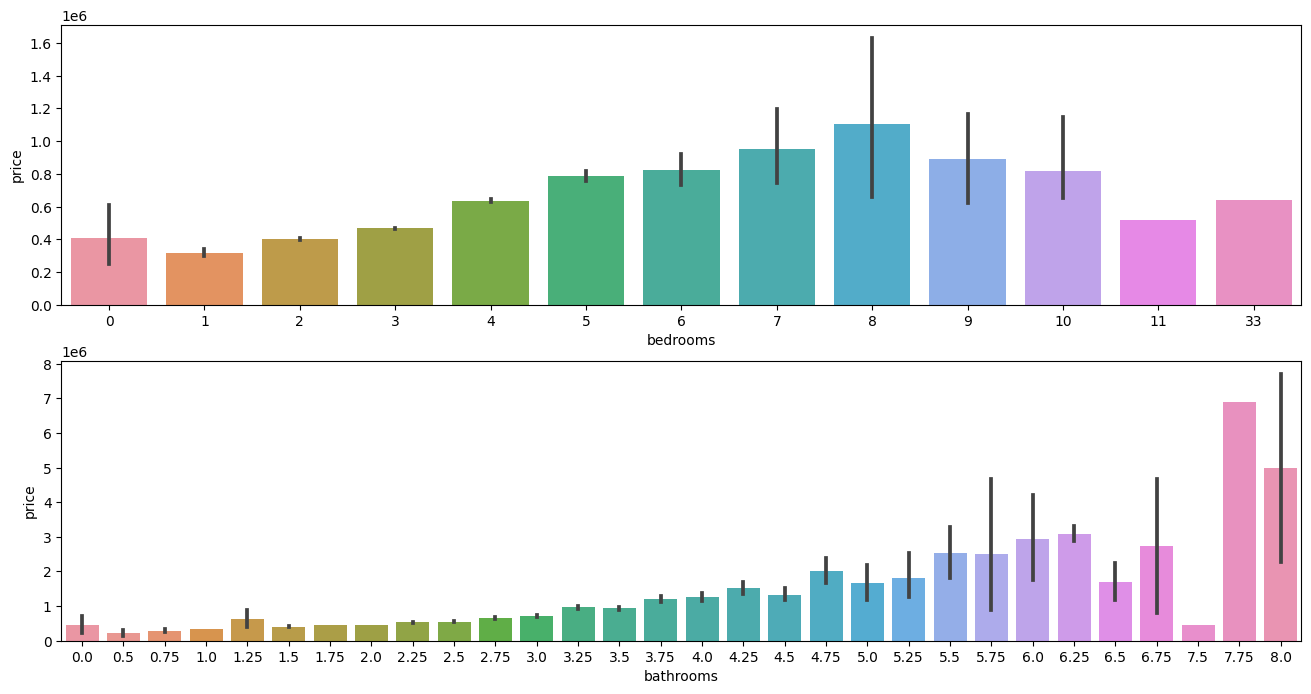

In [10]:
# bedrooms and bathrooms related to price
figure, axes = plt.subplots(2, 1, figsize=(16,8))
sns.barplot(ax=axes[0], x=bedrooms, y=price, data=house_data) 
sns.barplot(ax=axes[1], x=bathrooms, y=price, data=house_data) 

In [ ]:
# Data looks good - do we need any more cleaning at this point?
# TBD

In [11]:
# Feature engineering - Do we really need it?
# TBD

In [12]:
#Extract features and labels
house_data_features = house_data.drop([price,'id','date'], axis=1)
house_data_labels = house_data[price]
# export train and test sets
train_features,test_features,train_labels,test_labels= train_test_split(house_data_features,house_data_labels,test_size=0.21, random_state=42)

In [14]:
train_features.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16580,5,2.5,4250,20441,1.0,0,1,4,11,2490,1760,1984,0,98004,47.6377,-122.211,3620,16304
2814,2,3.0,1790,1709,2.0,0,0,3,7,1400,390,2001,0,98144,47.5926,-122.296,1460,1462
1697,4,2.5,2930,18199,2.0,0,0,3,9,2930,0,1998,0,98075,47.5937,-122.047,2930,33976
19281,4,2.5,3440,6332,2.0,0,0,3,10,3440,0,2001,0,98059,47.5347,-122.155,3310,6528
12865,3,2.0,1590,9912,2.0,0,0,3,8,1590,0,2000,0,98070,47.3731,-122.430,1670,9912


In [15]:
train_labels.head()

16580    1810000.0
2814      450000.0
1697      749000.0
19281     781500.0
12865     385000.0
Name: price, dtype: float64

In [16]:
test_features.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
735,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
2830,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
4106,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
16218,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
19964,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [17]:
test_labels.head()

735       365000.0
2830      865000.0
4106     1038000.0
16218    1490000.0
19964     711000.0
Name: price, dtype: float64

In [18]:
# export train and test data to csv format
train_features.to_csv('./Data/kc_pp_train_features.csv')
train_labels.to_csv('./Data/kc_pp_train_labels.csv')
test_features.to_csv('./Data/kc_pp_test_features.csv')
test_labels.to_csv('./Data/kc_pp_test_labels.csv')